In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
review = pd.read_csv(r'D:\final project\DataBase\Output\Output For Cleaning ver 2\review_clean_base.csv')
review.drop(review.columns[0], axis = 1, inplace = True)

In [6]:
def word_frequency(text):
    wordList = text.split()
    # generate frequencey of word to dictionary 
    wordFreq = {word : wordList.count(word) for word in wordList}
    return wordFreq

def wordcloud_freq(word_freq,title,figure_size = (10,5)):
    wordcloud.generate_from_frequencies(word_freq)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show

In [7]:
review[review['clean_text'].isna()] #drop row ini

,Brand,Product,UserName,Recommend,PostDate,Review,Rating,SkinCond,Age,positivity,clean_text
1509,Wardah,Intensive Night Cream,vinkaamalia,Recommend,2020-05-27,.................................................,4,Normal,19 - 24,1,NaN
7072,Laneige,Laneige Water Sleeping Mask,suhay,Recommend,2020-07-05,.................................................,3,NaN,19 - 24,0,NaN


In [8]:
review.drop(review[review['clean_text'].isna()].index, inplace= True)

# Text Cleaning 2

** replacing and add stop word in different file (clean_ver2.py)**

In [9]:
# word_freq = word_frequency(' '.join(review['clean_text'].dropna()))
# zipping = list(zip(word_freq.keys(), word_freq.values()))
# zipping.sort()
# for word, freq in zipping:
#     if freq < 5:
#         under_5.append(word)
# pd.DataFrame(under_5, columns=['word_check']).to_csv(r'D:\final project\DataBase\Output\Output For Cleaning ver 2\word review.csv', index = False)
# #selanjutnya check manual kata kata penting

In [10]:
import clean_ver2
#modul lokal

In [11]:
review['clean_text2'] = review['clean_text'].apply(clean_ver2)

## WordCloud

In [12]:
Wardah = review[review['Brand'] == 'Wardah']

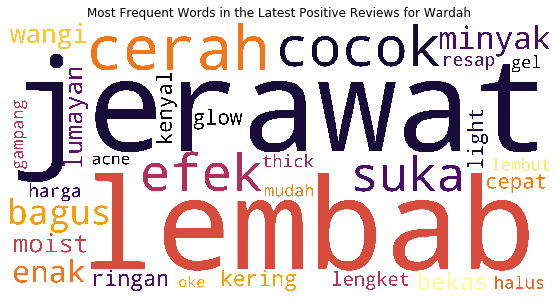

In [13]:
Wardah_pos = " ".join(Wardah[Wardah['positivity'] == 1]['clean_text2'].dropna())
Wardah_pos = word_frequency(Wardah_pos)
zipping = list(zip(Wardah_pos.values(), Wardah_pos.keys()))
zipping.sort()
Wardah_pos = {}
for values, keys in zipping[-30:]:
    Wardah_pos[keys] = values
wordcloud = WordCloud(width = 5000,
                     height = 2500,
                     colormap ='inferno',
                     background_color='white')
wordcloud_freq(Wardah_pos, 'Most Frequent Words in the Latest Positive Reviews for Wardah')

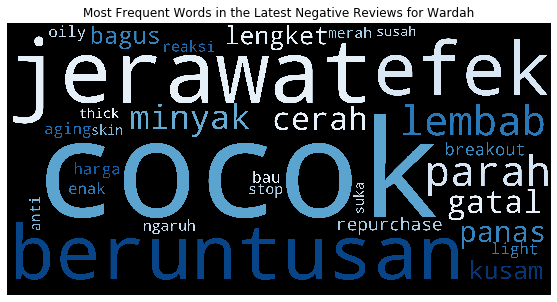

In [16]:
Wardah_neg = " ".join(Wardah[Wardah['positivity'] == -1]['clean_text2'].dropna())
Wardah_neg = word_frequency(Wardah_neg)
zipping = list(zip(Wardah_neg.values(), Wardah_neg.keys()))
zipping.sort()
Wardah_neg = {}
for values, keys in zipping[-30:]:
    Wardah_neg[keys] = values
wordcloud = WordCloud(width = 5000,
                     height = 2500,
                     colormap ='Blues',
                     background_color='black')
wordcloud_freq(Wardah_neg, 'Most Frequent Words in the Latest Negative Reviews for Wardah')

**Remove kata yang freq = 1 (untuk modelling)**

In [17]:
wordcheck =' '.join(review['clean_text2'])
word_freq = word_frequency(wordcheck)
df = pd.DataFrame(word_freq.values(), index = word_freq.keys(), columns = ['freq'])
freqisone = df[df['freq'] <= 2].index

In [18]:
df = pd.DataFrame(word_freq.values(), index = word_freq.keys(), columns = ['freq'])
freqisone = df[df['freq'] <= 2].index

In [19]:
def clean_text3(txt):
    txt = txt.split()
    txt = [word for word in txt if word not in freqisone]
    return ' '.join(txt)

review['clean_text3'] = review['clean_text2'].apply(clean_text3)

# Feature Extraction

## 1. Count Vectorizer (Bag of Words)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bag_of_word = vectorizer.fit_transform(review['clean_text3'])

## 2. TF-IDF (Term Frequency & Inverse Document Frequency)

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer().fit(bag_of_word)
tfidf = tfidf.transform(bag_of_word)

# EXPORT VARIABLE FOR MODELLING

In [22]:
bow = vectorizer.get_feature_names()
# feature_extraction = tfidf.toarray()
sentiment = review['positivity']

In [42]:
import joblib
joblib.dump(bow, r'D:\final project\DataBase\Output\Output For Modelling\bow')
joblib.dump(feature_extraction, r'D:\final project\DataBase\Output\Output For Modelling\feature_extraction')
joblib.dump(sentiment, r'D:\final project\DataBase\Output\Output For Modelling\sentiment')

['D:\\final project\\DataBase\\Output\\Output For Modelling\\sentiment']

In [23]:
import joblib
joblib.dump(bag_of_word, 'bow')

['bow']